In [1291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [1214]:
stats = pd.read_csv('Player Statistics.csv')
stats

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Pedro Neto,7.0,Wolverhampton-Wanderers,Forward,Portugal,20.0,31,14,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,16,5.0
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,Forward,Mexico,29.0,78,32,23,32,...,NaN,NaN,NaN,NaN,NaN,NaN,7,0,81,52.0
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,5,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,80,13.0
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


In [1215]:
stats['Position'].value_counts()

Midfielder    198
Defender      194
Forward       110
Goalkeeper     69
Name: Position, dtype: int64

## Creating 4 Dataframes based on Player Position

In [1216]:
# Seperating Goalkeepers from Position Players
gk_df = stats[stats['Position'] == 'Goalkeeper']

In [1217]:
# Remove the rows where Position is 'Goalkeeper' from the original DataFrame
pos_stats = stats[stats['Position'] != 'Goalkeeper']


In [1218]:
gk_df

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
30,Tom Heaton,1.0,Aston-Villa,Goalkeeper,England,34.0,116,34,55,0,...,40.0,96.0,73.0,53.0,436.0,1023.0,5,0,2,NaN
31,Jed Steer,12.0,Aston-Villa,Goalkeeper,England,28.0,2,0,2,0,...,0.0,1.0,0.0,2.0,8.0,5.0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,David Martin,25.0,West-Ham-United,Goalkeeper,England,34.0,5,2,3,0,...,1.0,1.0,0.0,0.0,12.0,44.0,1,0,0,NaN
522,Darren Randolph,35.0,West-Ham-United,Goalkeeper,Ireland,33.0,31,10,14,0,...,6.0,33.0,8.0,15.0,97.0,262.0,1,0,0,NaN
523,Nathan Trott,34.0,West-Ham-United,Goalkeeper,England,21.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
549,Rui Patrício,11.0,Wolverhampton-Wanderers,Goalkeeper,Portugal,32.0,77,31,23,0,...,13.0,32.0,17.0,5.0,244.0,581.0,0,0,0,NaN


### Removing irrelevant statistics for goalkeepers

In [1219]:
# Set the threshold for NaN values
nan_threshold = 5

# Calculate the count of NaN values in each column
nan_value_count = gk_df.isna().sum()

# Identify columns where the count of NaN values is greater than the threshold
columns_to_drop = nan_value_count[nan_value_count > nan_threshold].index

# Drop the identified columns from the DataFrame
gk_df = gk_df.drop(columns=columns_to_drop)


In [1220]:
gk_df

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,1.0,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
30,Tom Heaton,1.0,Aston-Villa,Goalkeeper,England,34.0,116,34,55,0,...,3.0,40.0,96.0,73.0,53.0,436.0,1023.0,5,0,2
31,Jed Steer,12.0,Aston-Villa,Goalkeeper,England,28.0,2,0,2,0,...,0.0,0.0,1.0,0.0,2.0,8.0,5.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,David Martin,25.0,West-Ham-United,Goalkeeper,England,34.0,5,2,3,0,...,0.0,1.0,1.0,0.0,0.0,12.0,44.0,1,0,0
522,Darren Randolph,35.0,West-Ham-United,Goalkeeper,Ireland,33.0,31,10,14,0,...,1.0,6.0,33.0,8.0,15.0,97.0,262.0,1,0,0
523,Nathan Trott,34.0,West-Ham-United,Goalkeeper,England,21.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
549,Rui Patrício,11.0,Wolverhampton-Wanderers,Goalkeeper,Portugal,32.0,77,31,23,0,...,2.0,13.0,32.0,17.0,5.0,244.0,581.0,0,0,0


In [1221]:
# Split the DataFrame into three separate DataFrames based on the "Position" column
defender_df = pos_stats[pos_stats['Position'] == 'Defender']
midfielder_df = pos_stats[pos_stats['Position'] == 'Midfielder']
forward_df = pos_stats[pos_stats['Position'] == 'Forward']

### Removing irrelevant statistics for each position

In [1222]:
defender_df

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0
5,William Saliba,4.0,Arsenal,Defender,France,19.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
6,Sokratis,5.0,Arsenal,Defender,Greece,32.0,44,21,11,3,...,NaN,NaN,NaN,NaN,NaN,NaN,18,0,56,1.0
7,Rob Holding,16.0,Arsenal,Defender,England,25.0,41,25,9,0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,0,32,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,Rúben Vinagre,29.0,Wolverhampton-Wanderers,Defender,Portugal,21.0,34,14,10,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,19,1.0
555,Maximilian Kilman,49.0,Wolverhampton-Wanderers,Defender,England,23.0,4,2,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2,0.0
556,Oskar Buur,59.0,Wolverhampton-Wanderers,Defender,Denmark,22.0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
557,Marçal,5.0,Wolverhampton-Wanderers,Defender,Brazil,31.0,2,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0.0


In [1223]:
# Drop columns with NaN values
defender_df = defender_df.dropna(axis=1)
defender_df

,Name,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Headed goals,...,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides
3,Héctor Bellerín,Arsenal,Defender,Spain,25.0,160,90,37,7,0.0,...,44.53,28.0,389.0,16%,31.0,144.0,23,0,125,8.0
4,Kieran Tierney,Arsenal,Defender,Scotland,23.0,16,7,5,1,0.0,...,32.44,1.0,45.0,18%,0.0,22.0,2,0,9,0.0
5,William Saliba,Arsenal,Defender,France,19.0,0,0,0,0,0.0,...,0.00,0.0,0.0,0%,0.0,0.0,0,0,0,0.0
6,Sokratis,Arsenal,Defender,Greece,32.0,44,21,11,3,1.0,...,54.91,4.0,1.0,1%,2.0,172.0,18,0,56,1.0
7,Rob Holding,Arsenal,Defender,England,25.0,41,25,9,0,0.0,...,53.66,0.0,3.0,67%,1.0,116.0,8,0,32,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,Rúben Vinagre,Wolverhampton-Wanderers,Defender,Portugal,21.0,34,14,10,0,0.0,...,16.35,3.0,83.0,19%,1.0,14.0,2,0,19,1.0
555,Maximilian Kilman,Wolverhampton-Wanderers,Defender,England,23.0,4,2,1,0,0.0,...,25.25,0.0,0.0,0%,0.0,2.0,0,0,2,0.0
556,Oskar Buur,Wolverhampton-Wanderers,Defender,Denmark,22.0,1,1,0,0,0.0,...,14.00,0.0,0.0,0%,0.0,0.0,0,0,0,0.0
557,Marçal,Wolverhampton-Wanderers,Defender,Brazil,31.0,2,1,1,0,0.0,...,18.50,0.0,1.0,1%,0.0,2.0,1,0,1,0.0


In [1224]:
midfielder_df

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
13,Mesut Özil,10.0,Arsenal,Midfielder,Germany,31.0,184,100,39,33,...,NaN,NaN,NaN,NaN,NaN,NaN,13,0,95,83.0
14,Lucas Torreira,11.0,Arsenal,Midfielder,Uruguay,24.0,63,28,15,3,...,NaN,NaN,NaN,NaN,NaN,NaN,14,1,62,0.0
15,Ainsley Maitland-Niles,15.0,Arsenal,Midfielder,England,23.0,54,26,16,1,...,NaN,NaN,NaN,NaN,NaN,NaN,6,2,35,1.0
16,Mohamed Elneny,25.0,Arsenal,Midfielder,Egypt,28.0,47,29,10,0,...,NaN,NaN,NaN,NaN,NaN,NaN,7,1,24,2.0
17,Joseph Willock,28.0,Arsenal,Midfielder,England,21.0,33,12,12,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,Romain Saïss,27.0,Wolverhampton-Wanderers,Midfielder,Morocco,30.0,54,24,16,5,...,NaN,NaN,NaN,NaN,NaN,NaN,17,1,72,2.0
562,João Moutinho,28.0,Wolverhampton-Wanderers,Midfielder,Portugal,34.0,78,32,23,2,...,NaN,NaN,NaN,NaN,NaN,NaN,11,0,95,3.0
563,Leander Dendoncker,32.0,Wolverhampton-Wanderers,Midfielder,Belgium,25.0,59,26,15,6,...,NaN,NaN,NaN,NaN,NaN,NaN,6,0,43,1.0
564,Vitinha,20.0,Wolverhampton-Wanderers,Midfielder,Portugal,20.0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


In [1225]:
forward_df

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
23,Alexandre Lacazette,9.0,Arsenal,Forward,France,29.0,99,46,28,39,...,NaN,NaN,NaN,NaN,NaN,NaN,11,0,127,62.0
24,Pierre-Emerick Aubameyang,14.0,Arsenal,Forward,Gabon,31.0,87,43,25,55,...,NaN,NaN,NaN,NaN,NaN,NaN,4,1,30,55.0
25,Nicolas Pépé,19.0,Arsenal,Forward,Cote D'Ivoire,25.0,33,15,9,5,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,14,4.0
26,Reiss Nelson,24.0,Arsenal,Forward,England,20.0,20,10,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,8,4.0
27,Eddie Nketiah,30.0,Arsenal,Forward,England,21.0,23,12,8,4,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,18,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Pedro Neto,7.0,Wolverhampton-Wanderers,Forward,Portugal,20.0,31,14,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,16,5.0
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,Forward,Mexico,29.0,78,32,23,32,...,NaN,NaN,NaN,NaN,NaN,NaN,7,0,81,52.0
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,5,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,80,13.0
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


In [1226]:
# Drop columns with NaN values
forward_df = forward_df.dropna(axis=1)
forward_df

,Name,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,...,Headed Clearance,Assists,Passes,Passes per match,Big chances created,Crosses,Yellow cards,Red cards,Fouls,Offsides
23,Alexandre Lacazette,Arsenal,Forward,France,29.0,99,46,28,39,0.39,...,35.0,16,2045,20.66,15.0,60.0,11,0,127,62.0
24,Pierre-Emerick Aubameyang,Arsenal,Forward,Gabon,31.0,87,43,25,55,0.63,...,12.0,13,1880,21.61,17.0,155.0,4,1,30,55.0
25,Nicolas Pépé,Arsenal,Forward,Cote D'Ivoire,25.0,33,15,9,5,0.15,...,2.0,6,723,21.91,8.0,113.0,4,0,14,4.0
26,Reiss Nelson,Arsenal,Forward,England,20.0,20,10,5,1,0.05,...,0.0,0,286,14.30,0.0,25.0,1,0,8,4.0
27,Eddie Nketiah,Arsenal,Forward,England,21.0,23,12,8,4,0.17,...,2.0,0,172,7.48,1.0,1.0,0,1,18,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Pedro Neto,Wolverhampton-Wanderers,Forward,Portugal,20.0,31,14,7,3,0.10,...,0.0,4,399,12.87,5.0,52.0,3,0,16,5.0
567,Raúl Jiménez,Wolverhampton-Wanderers,Forward,Mexico,29.0,78,32,23,32,0.41,...,57.0,13,2108,27.03,26.0,57.0,7,0,81,52.0
568,Adama Traoré,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,5,0.05,...,13.0,12,1434,13.66,13.0,327.0,4,0,80,13.0
569,Fábio Silva,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0,1.00,...,0.0,0,1,1.00,0.0,0.0,0,0,0,0.0


### Linear Regression for Each Position

##### Goalkeepers

In [1227]:
gk_df.value_counts()

Name               Jersey Number  Club                     Position    Nationality  Age   Appearances  Wins  Losses  Goals  Clean sheets  Goals conceded  Own goals  Errors leading to goal  Assists  Passes  Passes per match  Accurate long balls  Saves  Penalties saved  Punches  High Claims  Catches  Sweeper clearances  Throw outs  Goal Kicks  Yellow cards  Red cards  Fouls
Ørjan Nyland       25.0           Aston-Villa              Goalkeeper  Norway       30.0  7            1     4       0      1.0           12.0            0.0        0.0                     0        152     21.71             35.0                 15.0   0.0              1.0      3.0          2.0      0.0                 29.0        53.0        0             0          0        1
David Martin       25.0           West-Ham-United          Goalkeeper  England      34.0  5            2     3       0      2.0           6.0             0.0        1.0                     0        111     22.20             40.0                 

In [1228]:
# Split data into training and testing sets
gk_train, gk_test = train_test_split(gk_df, test_size=0.5)

In [1229]:
# Define the feature columns for gk_df
gk_features = ['Clean sheets',  'Goals conceded',  'Own goals',  'Errors leading to goal', 'Saves', 'Penalties saved', 'Punches', 'High Claims', 'Catches', 'Accurate long balls', 'Sweeper clearances']


In [1230]:
# Standard scale the feature data
scaler = StandardScaler()
gk_train_scaled = scaler.fit_transform(gk_train[gk_features])
gk_test_scaled = scaler.transform(gk_test[gk_features])

In [1231]:
# Create linear regression model
gk_model = LinearRegression()

In [1232]:
# Fit model
gk_model.fit(gk_train[gk_features], gk_train['Wins'])


LinearRegression()

In [1233]:
# Make predictions
gk_predictions = gk_model.predict(gk_test[gk_features])

In [1234]:
# Evaluate model
gk_mse = mean_squared_error(gk_test['Wins'], gk_predictions)
gk_r2 = r2_score(gk_test['Wins'], gk_predictions)

# Print evaluation metrics for gk_df
print("Goalkeeper Model - MSE:", gk_mse)
print("Goalkeeper Model - R-squared:", gk_r2)

Goalkeeper Model - MSE: 56.48653776535366
Goalkeeper Model - R-squared: 0.9522306476278537


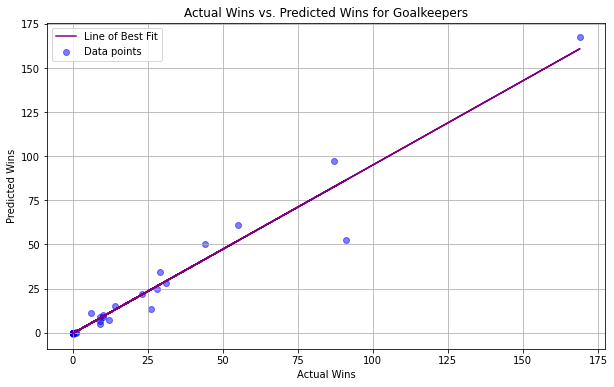

In [1235]:
# Calculate the line of best fit
slope, intercept = np.polyfit(gk_test['Wins'], gk_predictions, 1)
line_of_best_fit = slope * gk_test['Wins'] + intercept

# Plot actual wins vs. predicted wins with the line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(gk_test['Wins'], gk_predictions, color='blue', alpha=0.5, label='Data points')
plt.plot(gk_test['Wins'], line_of_best_fit, color='purple', label='Line of Best Fit')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual Wins vs. Predicted Wins for Goalkeepers')
plt.grid(True)
plt.legend()
plt.show()

##### Defenders

In [1236]:
# Split data into training and testing sets
defender_train, defender_test = train_test_split(defender_df, test_size=0.5)


In [1237]:
# Define the feature columns for defender_df
defender_features = ['Tackles','Blocked shots', 'Interceptions', 'Clearances','Headed Clearance', 'Recoveries', 'Duels won', 'Duels lost', 'Successful 50/50s', 'Aerial battles won','Aerial battles lost', 'Errors leading to goal','Red cards' ] 


In [1238]:
# Standard scale the feature data
scaler = StandardScaler()
defender_train_scaled = scaler.fit_transform(defender_train[defender_features])
defender_test_scaled = scaler.transform(defender_test[defender_features])


In [1239]:
# Create linear regression model
defender_model = LinearRegression()

In [1240]:
# Fit model
defender_model.fit(defender_train[defender_features], defender_train['Wins'])

LinearRegression()

In [1241]:
# Make predictions
defender_predictions = defender_model.predict(defender_test[defender_features])

In [1242]:
# Evaluate model
defender_mse = mean_squared_error(defender_test['Wins'], defender_predictions)
defender_r2 = r2_score(defender_test['Wins'], defender_predictions)

# Print evaluation metrics for defender_df
print("Defender Model - MSE:", defender_mse)
print("Defender Model - R-squared:", defender_r2)

Defender Model - MSE: 228.28009600147738
Defender Model - R-squared: 0.8285441241611632


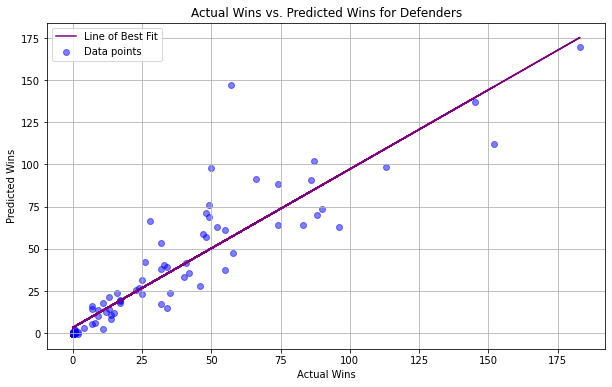

In [1243]:
# Calculate the line of best fit
slope, intercept = np.polyfit(defender_test['Wins'], defender_predictions, 1)
line_of_best_fit = slope * defender_test['Wins'] + intercept

# Plot actual wins vs. predicted wins with the line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(defender_test['Wins'], defender_predictions, color='blue', alpha=0.5, label='Data points')
plt.plot(defender_test['Wins'], line_of_best_fit, color='purple', label='Line of Best Fit')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual Wins vs. Predicted Wins for Defenders')
plt.grid(True)
plt.legend()
plt.show()

##### Midfielders

In [1244]:
# Split data into training and testing sets
midfielder_train, midfielder_test = train_test_split(midfielders_df, test_size=0.5)


In [1245]:
# Exclude the columns you don't want to use
excluded_columns = ['Jersey Number', 'Club', 'Nationality' 'Appearances','Own goals', 'Last man tackles', 'Clearances off line', 'Shooting accuracy %', 'Tackle success %', 'Cross accuracy %']
midfielder_features = [col for col in midfielder_features if col not in excluded_columns]


In [1246]:
# Standard scale the feature data
scaler = StandardScaler()
midfielder_train_scaled = scaler.fit_transform(midfielder_train[midfielder_features])
midfielder_test_scaled = scaler.transform(midfielder_test[midfielder_features])


In [1247]:
# Create linear regression model
midfielder_model = LinearRegression()

In [1248]:
# Fit model with scaled data
midfielder_model.fit(midfielder_train_scaled, midfielder_train['Wins'])

LinearRegression()

In [1249]:
# Make predictions with scaled test data
midfielder_predictions = midfielder_model.predict(midfielder_test_scaled)

In [1250]:
# Evaluate model
midfielder_mse = mean_squared_error(midfielder_test['Wins'], midfielder_predictions)
midfielder_r2 = r2_score(midfielder_test['Wins'], midfielder_predictions)

# Print evaluation metrics for midfielders_df
print("Midfielder Model - MSE:", midfielder_mse)
print("Midfielder Model - R-squared:", midfielder_r2)

Midfielder Model - MSE: 283.6330021975245
Midfielder Model - R-squared: 0.7970301151663645


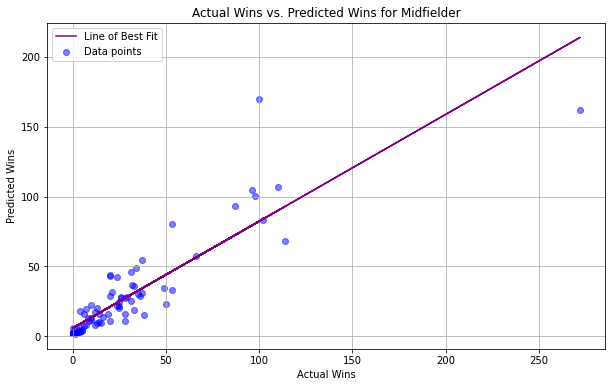

In [1251]:
# Calculate the line of best fit
slope, intercept = np.polyfit(midfielder_test['Wins'], midfielder_predictions, 1)
line_of_best_fit = slope * midfielder_test['Wins'] + intercept

# Plot actual wins vs. predicted wins with the line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(midfielder_test['Wins'], midfielder_predictions, color='blue', alpha=0.5, label='Data points')
plt.plot(midfielder_test['Wins'], line_of_best_fit, color='purple', label='Line of Best Fit')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual Wins vs. Predicted Wins for Midfielder')
plt.grid(True)
plt.legend()
plt.show()

##### Forwards

In [1252]:
# Split data into training and testing sets
forward_train, forward_test = train_test_split(forward_df, test_size=0.5)

In [1253]:
# Exclude the columns you don't want to use
excluded_columns = ['Jersey Number', 'Club', 'Nationality', 'Age', 'Appearances', 'Red Cards','Recoveries','Duels won', 'Duels lost', 'Successful 50/50s', 'Aerial battles won','Aerial battles lost','Errors leading to goal','Through balls', 'Accurate long balls', 'Shooting accuracy %', 'Tackle success %', 'Cross accuracy %']
forward_features = [col for col in forward_features if col not in excluded_columns]


In [1254]:
# Standard scale the feature data
scaler = StandardScaler()
forward_train_scaled = scaler.fit_transform(forward_train[forward_features])
forward_test_scaled = scaler.transform(forward_test[forward_features])

In [1255]:
# Create linear regression model
forward_model = LinearRegression()

In [1256]:
# Fit model with scaled data
forward_model.fit(forward_train_scaled, forward_train['Wins'])

LinearRegression()

In [1257]:
# Make predictions with scaled test data
forward_predictions = forward_model.predict(forward_test_scaled)

In [1258]:
# Evaluate model
forward_mse = mean_squared_error(forward_test['Wins'], forward_predictions)
forward_r2 = r2_score(forward_test['Wins'], forward_predictions)

# Print evaluation metrics for forwards_df
print("Forward Model - MSE:", forward_mse)
print("Forward Model - R-squared:", forward_r2)

Forward Model - MSE: 94.38845676284298
Forward Model - R-squared: 0.9455368806518214


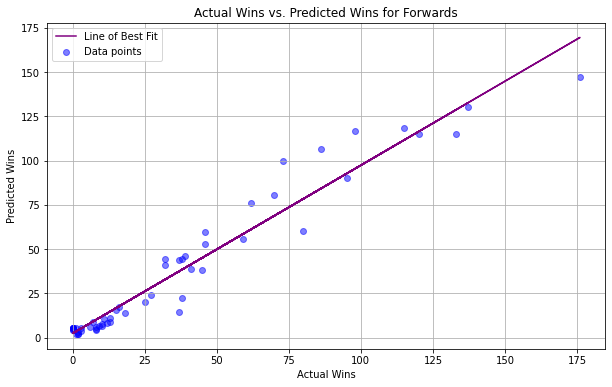

In [1259]:

# Calculate the line of best fit
slope, intercept = np.polyfit(forward_test['Wins'], forward_predictions, 1)
line_of_best_fit = slope * forward_test['Wins'] + intercept

# Plot actual wins vs. predicted wins with the line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(forward_test['Wins'], forward_predictions, color='blue', alpha=0.5, label='Data points')
plt.plot(forward_test['Wins'], line_of_best_fit, color='purple', label='Line of Best Fit')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual Wins vs. Predicted Wins for Forwards')
plt.grid(True)
plt.legend()
plt.show()

#### Logistic Regression

##### Goalkeeper

In [1286]:
gk_df['High Performer'] = (gk_df['Wins'] > gk_df['Losses']).astype(int)

In [1288]:
# Define features and target variable
selected_features = ['Clean sheets', 'Goals conceded', 'Saves', 'Errors leading to goal','Punches','Catches','High Claims']
X = gk_df[selected_features]
y = gk_df['High Performer']

In [1289]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1292]:
# Create a Logistic Regression model
gk_model = LogisticRegression()


In [1293]:
# Train the model on the training data
gk_model.fit(X_train, y_train)

LogisticRegression()

In [1294]:
# Make predictions on the testing data
y_pred = gk_model.predict(X_test)

In [1295]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.83      0.83      0.83         6

    accuracy                           0.86        14
   macro avg       0.85      0.85      0.85        14
weighted avg       0.86      0.86      0.86        14

Confusion Matrix:
 [[7 1]
 [1 5]]


##### Defender

In [1299]:
defender_df['High Performer'] = (defender_df['Wins'] > defender_df['Losses']).astype(int)

<ipython-input-1299-4f49f03c8810>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defender_df['High Performer'] = (defender_df['Wins'] > defender_df['Losses']).astype(int)


In [1300]:
# Define features and target variable
selected_features = ['Goals', 'Assists', 'Tackles','Blocked shots','Interceptions','Clearances','Headed Clearance','Recoveries','Duels won','Successful 50/50s','Aerial battles won']
X = defender_df[selected_features]
y = defender_df['High Performer']

In [1301]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1302]:
# Create a Logistic Regression model
defender_model = LogisticRegression()


In [1303]:
# Train the model on the training data
defender_model.fit(X_train, y_train)

c:\Users\NCG\anaconda3Flatiron\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1304]:
# Make predictions on the testing data
y_pred = defender_model.predict(X_test)

In [1305]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.48717948717948717
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.68      0.60        22
           1       0.36      0.24      0.29        17

    accuracy                           0.49        39
   macro avg       0.45      0.46      0.44        39
weighted avg       0.46      0.49      0.46        39

Confusion Matrix:
 [[15  7]
 [13  4]]


##### Midfielder

In [1306]:
midfielder_df['High Performer'] = (midfielder_df['Wins'] > midfielder_df['Losses']).astype(int)

<ipython-input-1306-5290294f1e42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midfielder_df['High Performer'] = (midfielder_df['Wins'] > midfielder_df['Losses']).astype(int)


In [1307]:
midfielder_df.value_counts()


Name                Jersey Number  Club                  Position    Nationality  Age   Appearances  Wins  Losses  Goals  Goals per match  Headed goals  Goals with right foot  Goals with left foot  Penalties scored  Freekicks scored  Shots  Shots on target  Shooting accuracy %  Hit woodwork  Big chances missed  Clean sheets  Goals conceded  Tackles  Tackle success %  Last man tackles  Blocked shots  Interceptions  Clearances  Headed Clearance  Clearances off line  Recoveries  Duels won  Duels lost  Successful 50/50s  Aerial battles won  Aerial battles lost  Own goals  Errors leading to goal  Assists  Passes  Passes per match  Big chances created  Crosses  Cross accuracy %  Through balls  Accurate long balls  Saves  Penalties saved  Punches  High Claims  Catches  Sweeper clearances  Throw outs  Goal Kicks  Yellow cards  Red cards  Fouls  Offsides  High Performer
Zak Brunt           42.0           Sheffield-United      Midfielder  England      18.0  0            0     0       0      0.00

In [1308]:
# Define features and target variable
selected_features = ['Goals', 'Assists', 'Tackles','Interceptions','Shots','Shots on target','Crosses','Through balls','Accurate long balls','Passes']
X = midfielder_df[selected_features]
y = midfielder_df['High Performer']

In [1309]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1310]:
# Create a Logistic Regression model
midfielder_model = LogisticRegression()


In [1311]:
# Train the model on the training data
midfielder_model.fit(X_train, y_train)

c:\Users\NCG\anaconda3Flatiron\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1312]:
# Make predictions on the testing data
y_pred = midfielder_model.predict(X_test)

In [1313]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70        23
           1       0.59      0.59      0.59        17

    accuracy                           0.65        40
   macro avg       0.64      0.64      0.64        40
weighted avg       0.65      0.65      0.65        40

Confusion Matrix:
 [[16  7]
 [ 7 10]]


##### Forwards

In [1316]:
forward_df['High Performer'] = (forward_df['Wins'] > forward_df['Losses']).astype(int)

<ipython-input-1316-6b0dce2eeed0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forward_df['High Performer'] = (forward_df['Wins'] > forward_df['Losses']).astype(int)


In [1319]:
# Define features and target variable
selected_features = ['Goals', 'Assists','Shots','Shots on target','Crosses','Passes']
X = forward_df[selected_features]
y = forward_df['High Performer']

In [1320]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1321]:
# Create a Logistic Regression model
forward_model = LogisticRegression()


In [1324]:
# Train the model on the training data
forward_model.fit(X_train, y_train)

c:\Users\NCG\anaconda3Flatiron\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1325]:
# Make predictions on the testing data
y_pred = forward_model.predict(X_test)

In [1326]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8181818181818182
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.71      0.71      0.71         7

    accuracy                           0.82        22
   macro avg       0.79      0.79      0.79        22
weighted avg       0.82      0.82      0.82        22

Confusion Matrix:
 [[13  2]
 [ 2  5]]
